### Explore the cryptocurrency course over history and see if meanigful predictions ca be made.

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('myteststyle.mplstyle')

dataf = 'Bitcoin/Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'


df = pd.read_csv(dataf, nrows=int(1e8)).dropna()
df.loc[:, 'Datetime'] = df.Timestamp.map(lambda ts: datetime.utcfromtimestamp(ts))
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


### First just plot the rate:

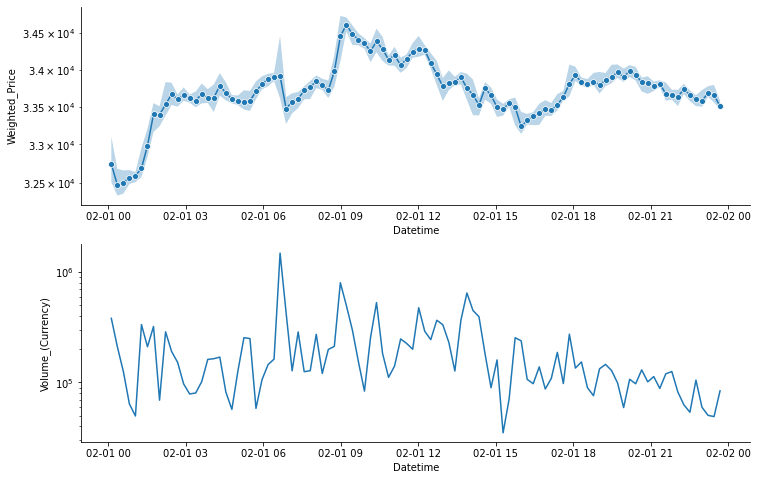

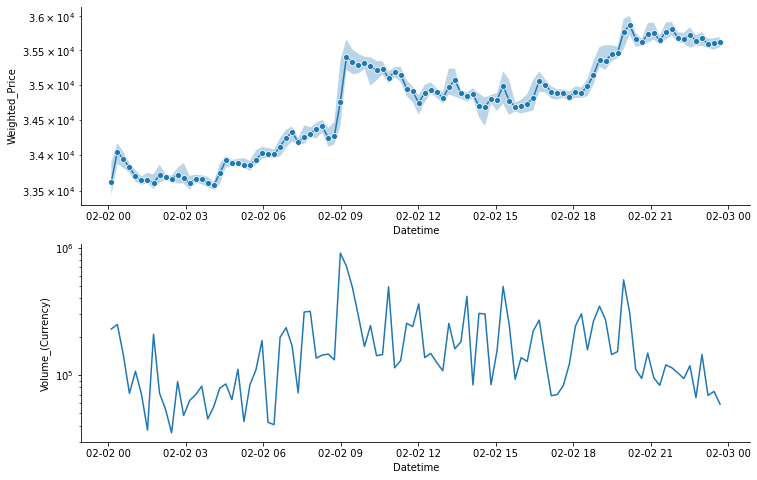

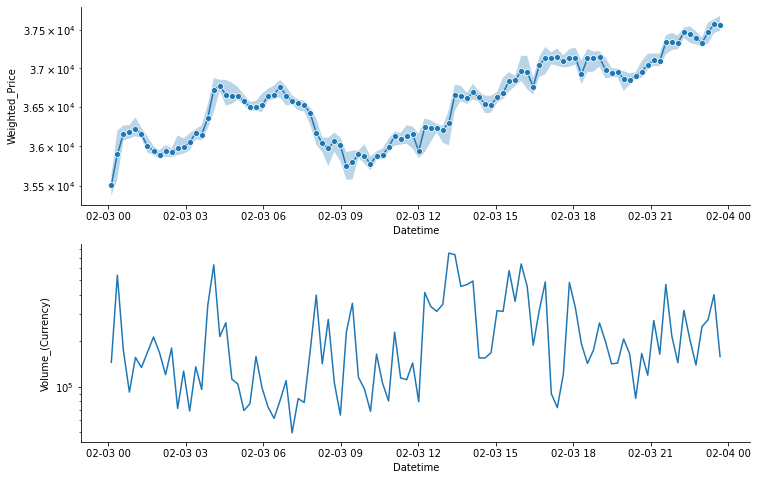

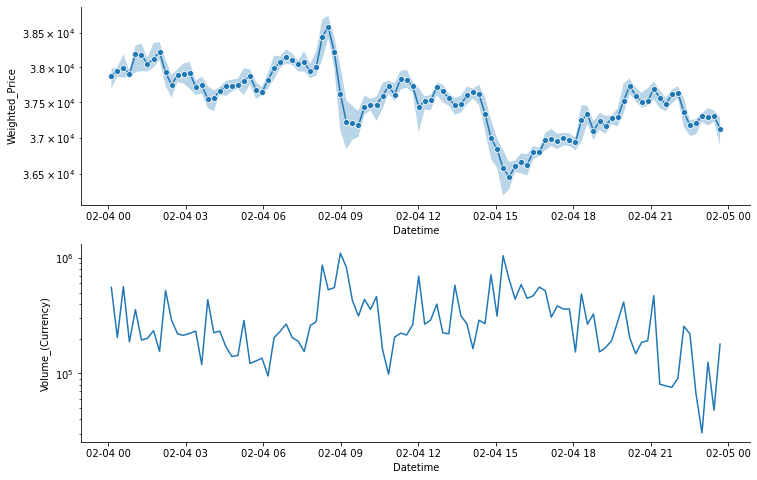

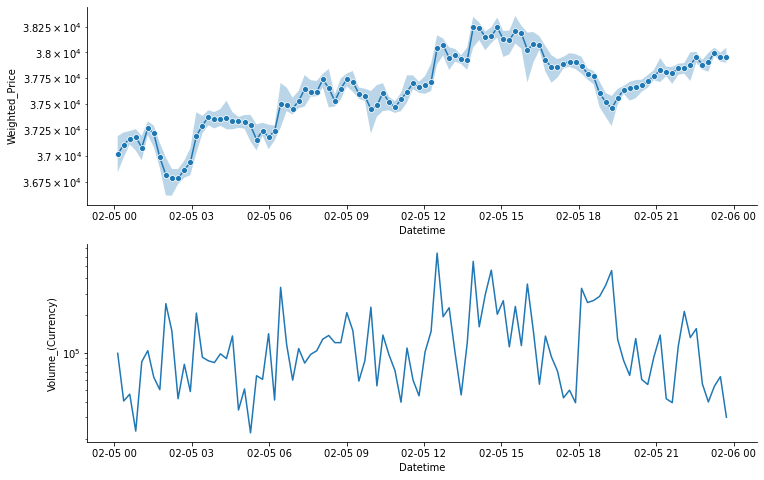

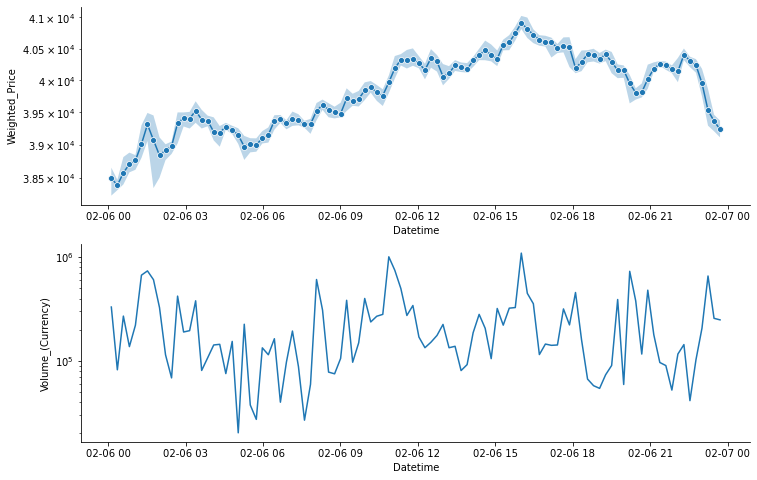

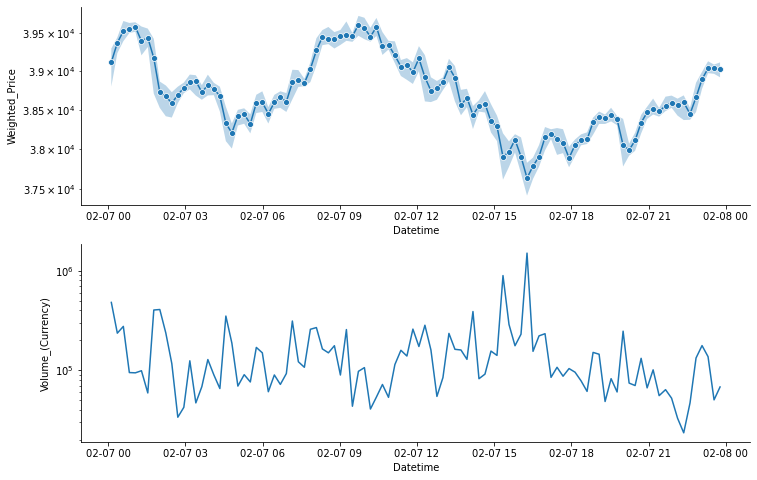

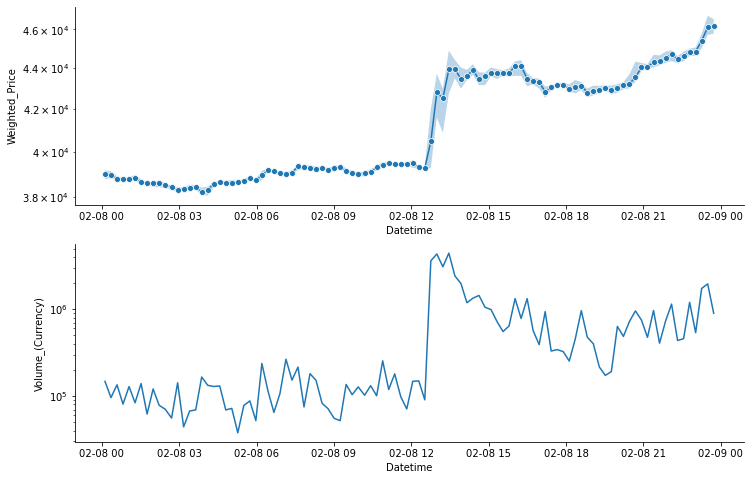

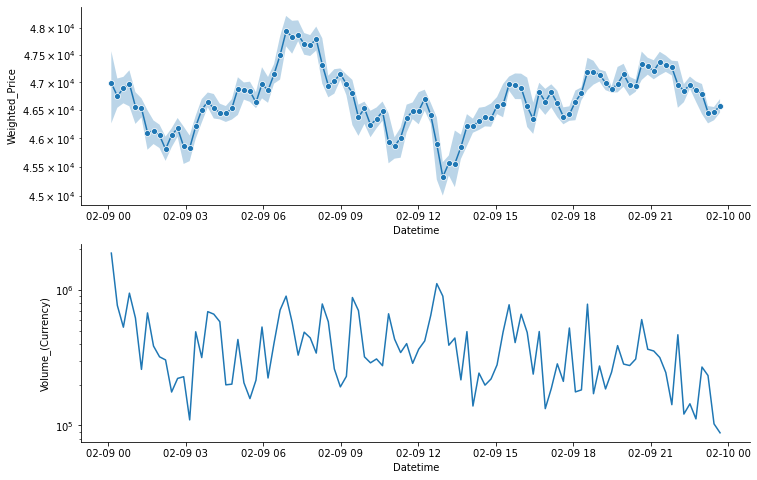

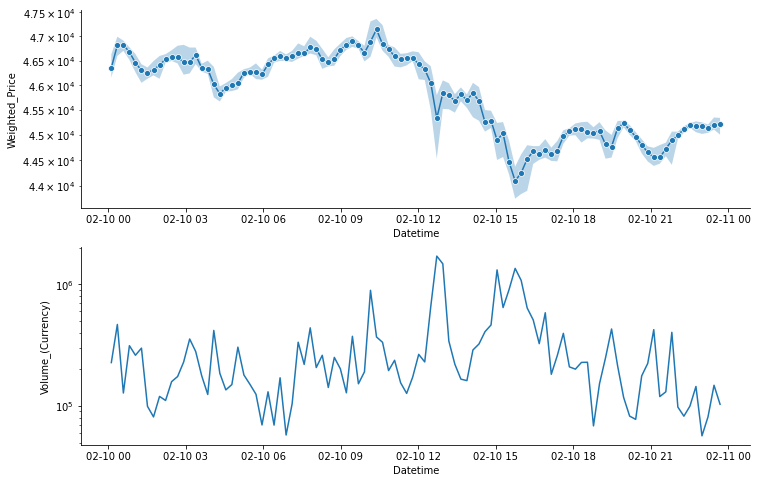

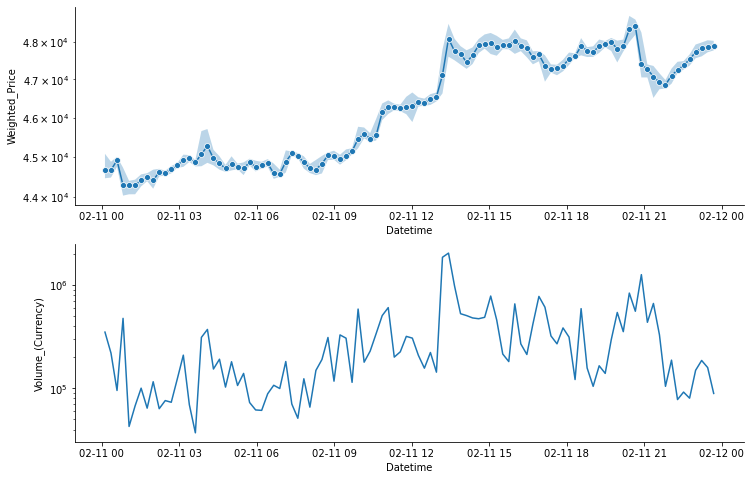

In [10]:
import seaborn as sns


def plot_rate(start_date, end_date, nwindow=100):
    
    figs = plt.rcParams['figure.figsize'].copy()
    figs[1] *= 2
    _, (ax1, ax2) = plt.subplots(2, figsize=figs)

    
    mask = (df['Datetime'] > start_date) & (df['Datetime'] < end_date)
    
    nwindow = min(mask.sum()//100, nwindow)
    
    roller = df.loc[mask].rolling(nwindow)
    rolled = roller.mean() 
    rolled.loc[:, 'High'] = roller.max().loc[:, 'High']
    rolled.loc[:, 'Low'] = roller.min().loc[:, 'Low']
    rolled = rolled.iloc[nwindow-1::nwindow]
    rolled.loc[:, 'Datetime'] = rolled.Timestamp.map(lambda ts: datetime.utcfromtimestamp(ts))

    for ax, ylab, m in zip((ax1, ax2), ('Weighted_Price', 'Volume_(Currency)'), ('o', '')):
        sns.lineplot(data=rolled, x='Datetime', y=ylab, ax=ax, marker=m)
        ax.semilogy()

    ax1.fill_between(rolled.Datetime, y1=rolled.Low, y2=rolled.High, alpha=.3)
    plt.show()
    

dt = timedelta(days=1)
start_date = datetime(2021, 2, 1)

for _ in range(11):
    end_date = start_date + dt
    plot_rate(start_date, end_date)
    start_date += dt
    
